<a href="https://colab.research.google.com/github/Jmsperdue/machineLearningNoteBooks/blob/MultiLayerPerceptron/Ast6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment #6**
**James Perdue 1012457081** 

**Daniel Schaefer 2001714504**
# **Multi-Layer Perception (MLP) Classifier:**

For this model we used the [banknote authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from UCI machine learning repository. The Goal of our model is to take the attributes and properly seperate forged bank notes from genuine ones.

# ***Import Dataset***
We converted the text file to a csv and added col 1 col 2 col 3 col 4 and class to make things easier and here is the key for the attributes and their meanings

Column 1. variance of Wavelet Transformed image (continuous)

Column 2. skewness of Wavelet Transformed image (continuous)

Column 3. curtosis of Wavelet Transformed image (continuous)

Column 4. entropy of image (continuous)

Column 5. class (integer) 

In [ ]:
import pandas as pd
df = pd.read_csv('banknote.csv',sep=',')
df

,col 1,col 2,col 3,col 4,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# **Define x and y** 


In [ ]:
x=df.drop(['class'], axis=1).values
y=df['class'].values

# **Split the data set into training set and test set** 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=1)

# **Hyper Parameter**

Rather than picking 3 arbitrary combinations of model parameters, 

We tried to use HyperParameters to find the best three performing, but they were so close the results looked identical, so instead We Just opted to use it for one of our models.

**Original HyperParameters:**

**Solver:** ‘lbfgs’, ‘sgd’, ‘adam’

**Learning Rate:**'constant', 'invscaling', 'adaptive'

**Activator:** 'logistic', 'tanh', 'relu', 'identity'

**Hidden Layer Sizes:** (100), (4),(4,2)

**Alpha:** .1, 0.001, 0.0001

In the end the best performing arguments were and we assigned them to clf1

**Solver:** ‘adam’

**Learning Rate:**'invscaling'

**Activator:** 'identity'

**Hidden Layer Sizes:** (4)

**Alpha:**0.0001

clf2's arguments were chosen at random

clf3's are the defaults values

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#estimator = Pipeline(steps=[("scaler", StandardScaler()),("estimator", MLPClassifier(random_state=1, max_iter=1000))])
#hidden_layer_sizes = [(4)]
#hyper_parameter = [
#                   {
#                    'estimator__hidden_layer_sizes': hidden_layer_sizes,
#                    #activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’  
#                    'estimator__activation': ['identity', 'logistic', 'tanh', 'relu'],  
#                    #solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#                    'estimator__solver': ['sgd', 'adam'],                                                     
#                    #alpha float, default=0.0001
#                    'estimator__alpha': [.0001,.001,],           
#                    #learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
#                    'estimator__learning_rate' : ['constant','invscaling' ,'adaptive'],                                       
#                   },
#]
#grid = GridSearchCV(estimator, hyper_parameter, refit=True, n_jobs=-1, cv=None,)
#grid.fit(X_train, y_train)
#grid_predictions = grid.predict(X_test)

#params with good rank_test_score
#good_df = pd.DataFrame(grid.cv_results_)
#good_df = good_df.loc[good_df['rank_test_score'] <= 3]
#good_df = good_df.loc[:, ~good_df.columns.isin(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score' , 'params'])]
#good_df = good_df.reset_index(drop=True)

# **Train the Model on the training set**
**To save time I commented out our HyperParameters and hardcoded the best results into clf1** 


In [ ]:
#ran with hyper parameter 
clf1 = Pipeline(steps=[("scaler", StandardScaler()), ("clf",MLPClassifier(learning_rate='invscaling', random_state=1, max_iter=1000,solver='adam', hidden_layer_sizes=(4), alpha =.0001, activation='identity' )),])
#random
clf2 = Pipeline(steps=[("scaler", StandardScaler()), ("clf",MLPClassifier(learning_rate='adaptive', random_state=1, max_iter=1000,solver='sgd', hidden_layer_sizes=(4,2), alpha =.001, activation='identity' )),])
#default arguments
clf3 = Pipeline(steps=[("scaler", StandardScaler()), ("clf",MLPClassifier(learning_rate='constant', random_state=1, max_iter=1000,solver='adam', hidden_layer_sizes=(100), alpha =.0001, activation='relu' )),])
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 MLPClassifier(hidden_layer_sizes=100, max_iter=1000,
                               random_state=1))])

# **Table of Convergence** 

In [ ]:
records = [clf1.named_steps["clf"].get_params() , clf2.named_steps["clf"].get_params(), clf3.named_steps["clf"].get_params() ]
iter_array = [clf1.named_steps["clf"].n_iter_ , clf2.named_steps["clf"].n_iter_, clf3.named_steps["clf"].n_iter_]
model_array = ["clf1", "clf2", "clf3"]
df = pd.DataFrame(records)
df.insert(0,"Model Name", model_array)
df.insert(1,"Iterations till Convergence", iter_array)
converge = df.loc[:, ~df.columns.isin(['batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start', 'learning_rate_init'])]
converge

,Model Name,Iterations till Convergence,activation,alpha,hidden_layer_sizes,learning_rate,solver
0,clf1,807,identity,0.0001,4,invscaling,adam
1,clf2,658,identity,0.0010,"(4, 2)",adaptive,sgd
2,clf3,338,relu,0.0001,100,constant,adam


# **Predict the training set results and test set results**




In [ ]:
from sklearn.metrics import confusion_matrix
#test set
y1_pred = clf1.predict(X_test)
y2_pred = clf2.predict(X_test)
y3_pred = clf3.predict(X_test)
#training set
ytrain1_pred = clf1.predict(X_train)
ytrain2_pred = clf2.predict(X_train)
ytrain3_pred = clf3.predict(X_train)

#test set
cm1 = confusion_matrix(y_test, y1_pred)
tn1,fp1,fn1,tp1 =cm1.ravel()
n1 = tn1 + fp1 + fn1 + tp1
cm2 = confusion_matrix(y_test, y2_pred)
tn2,fp2,fn2,tp2 =cm2.ravel()
n2 = tn2 + fp2 + fn2 + tp2
cm3 = confusion_matrix(y_test, y3_pred)
tn3,fp3,fn3,tp3 =cm3.ravel()
n3 = tn3 + fp3 + fn3 + tp3

#training set
traincm1 = confusion_matrix(y_train, ytrain1_pred)
atn1,afp1,afn1,atp1 =traincm1.ravel()
an1 = atn1 + afp1 + afn1 + atp1
traincm2 = confusion_matrix(y_train, ytrain2_pred)
atn2,afp2,afn2,atp2 =traincm2.ravel()
an2 = atn2 + afp2 + afn2 + atp2
traincm3 = confusion_matrix(y_train, ytrain3_pred)
atn3,afp3,afn3,atp3 =traincm3.ravel()
an3 = atn3 + afp3 + afn3 + atp3

# **Table of Evaluation Metrics for the Test Dataset and Training Dataset**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

metrics = [['clf1', accuracy_score(y_test, y1_pred), recall_score(y_test, y1_pred), (tn1/(tn1+fp1)), f1_score(y_test, y1_pred), log_loss(y_test, y1_pred)],
           ['clf2', accuracy_score(y_test, y2_pred), recall_score(y_test, y2_pred), (tn2/(tn2+fp2)), f1_score(y_test, y2_pred), log_loss(y_test, y2_pred)],
           ['clf3', accuracy_score(y_test, y3_pred), recall_score(y_test, y3_pred), (tn3/(tn3+fp3)), f1_score(y_test, y3_pred), log_loss(y_test, y3_pred)]]
test_metrics = pd.DataFrame(metrics, columns = ['Model Name', 'Accuracy', 'Sensitivity', 'Specificity', 'F1 Score', 'Log Loss'])
metrics = [['clf1', accuracy_score(y_train, ytrain1_pred), recall_score(y_train, ytrain1_pred), (atn1/(atn1+afp1)), f1_score(y_train, ytrain1_pred), log_loss(y_train, ytrain1_pred)],
           ['clf2', accuracy_score(y_train, ytrain2_pred), recall_score(y_train, ytrain2_pred), (atn2/(atn2+afp2)), f1_score(y_train, ytrain2_pred), log_loss(y_train, ytrain2_pred)],
           ['clf3', accuracy_score(y_train, ytrain3_pred), recall_score(y_train, ytrain3_pred), (atn3/(atn3+afp3)), f1_score(y_train, ytrain3_pred), log_loss(y_train, ytrain3_pred)]]
train_metrics = pd.DataFrame(metrics, columns = ['Model Name', 'Accuracy', 'Sensitivity', 'Specificity', 'F1 Score', 'Log Loss'])
print("Test Dataset\n")
test_metrics

Test Dataset



,Model Name,Accuracy,Sensitivity,Specificity,F1 Score,Log Loss
0,clf1,0.986339,1.000000,0.975369,0.984894,0.471852
1,clf2,0.978142,0.989775,0.968801,0.975806,0.754960
2,clf3,0.997268,1.000000,0.995074,0.996942,0.094370


In [ ]:
print("Training Dataset\n")
train_metrics

Training Dataset



,Model Name,Accuracy,Sensitivity,Specificity,F1 Score,Log Loss
0,clf1,0.981752,1.0,0.96732,0.979757,6.302842e-01
1,clf2,0.981752,1.0,0.96732,0.979757,6.302842e-01
2,clf3,1.000000,1.0,1.00000,1.000000,9.992007e-16


clf1 Confusion Matrix


Text(69.0, 0.5, 'Actual')

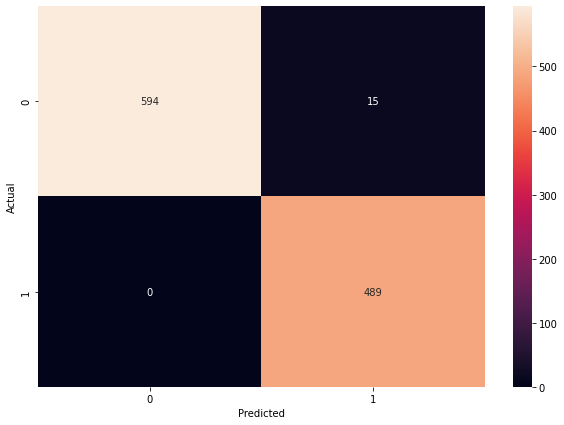

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

print("clf1 Confusion Matrix")
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

clf2 Confusion Matrix


Text(69.0, 0.5, 'Actual')

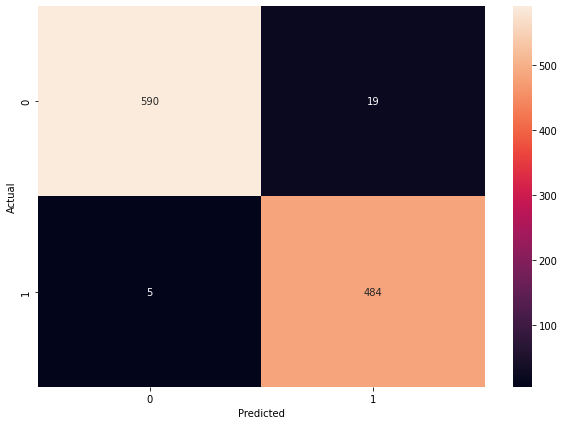

In [ ]:

print("clf2 Confusion Matrix")
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')



clf3 Confusion Matrix


Text(69.0, 0.5, 'Actual')

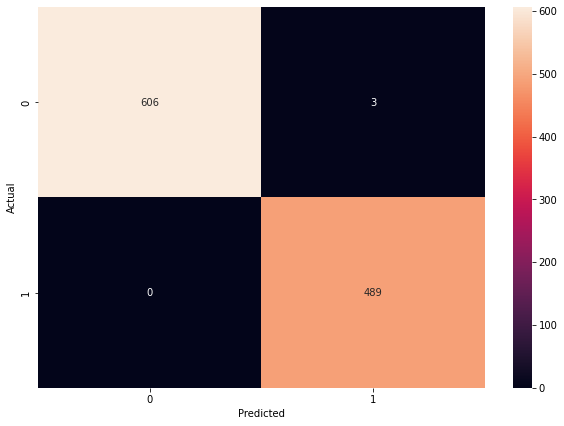

In [ ]:
print("clf3 Confusion Matrix")
plt.figure(figsize = (10,7))
sn.heatmap(cm3, annot=True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# **Assignment 4 Logistic Regression vs MLP Classifier**


In this section I pair our best fitting model vs Assignment 4's to compare performance.


In [ ]:
metrics = [[0.8925318761384335 , 0.8898128898128899, 0.8946515397082658, 0.8788501026694046, 3.7118648346379084],
           [accuracy_score(y_test, y1_pred), recall_score(y_test, y1_pred), (tn1/(tn1+fp1)), f1_score(y_test, y1_pred), log_loss(y_test, y1_pred)],
           [0,0,0,0,0],
           ]
compare_metrics = pd.DataFrame(metrics, columns = ['Accuracy', 'Sensitivity', 'Specificity', 'F1 Score', 'Log Loss'])
compare_metrics = compare_metrics.rename(index= {0: 'Ast4'})
compare_metrics = compare_metrics.rename(index= {1: 'clf1'})
compare_metrics = compare_metrics.rename(index= {2: 'Ast4 - clf1'})
compare_metrics.loc['Ast4 - clf1'] = compare_metrics.loc['Ast4'] - compare_metrics.loc['clf1']
compare_metrics


,Accuracy,Sensitivity,Specificity,F1 Score,Log Loss
Ast4,0.892532,0.889813,0.894652,0.878850,3.711865
clf1,0.986339,1.000000,0.975369,0.984894,0.471852
Ast4 - clf1,-0.093807,-0.110187,-0.080718,-0.106044,3.240013
